<a href="https://colab.research.google.com/github/Ali-Asgar-Lakdawala/HealthCare/blob/main/Diabetes_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report
import time

In [ ]:
# making a function to train the model and evaluate the model
def train_and_score (model,X_test,X_train,y_test,y_train, best_parameter=True, best_score=True):
  '''
  train the model and gives mse,rmse,r2,adj r2 score of the model
  can be used for any model where y is not transformed 
  '''

  #storing the start time of model training
  start=time.time()
  #training the model
  model.fit(X_train,y_train)
  #storing the time when the model ended trining 
  stop = time.time()
  #calculating the total time taken for model training 
  time_min=round((stop - start)/60,4)
  # printing the time taken to train the model
  print(f"Training time: {time_min}min")
  
  

  # finding the best parameters of the model if any 
  if best_parameter==True:
    # using try except method to avoid any error
    try:
      print("The best parameters found out to be :" ,model.best_params_)
    except:
      pass
  # finding best score of the model 
  if best_score==True:
    try:
      print(" \nwhere negative mean squared error is: ", model.best_score_,'\n')
    except:
      pass


  #predicting the values of y from x via model
  y_pred_test = model.predict(X_test)
  y_pred_train = model.predict(X_train)

  def score (actual,predicted,append=True):
    '''
    calcuating diffrent score matrix of the model
    '''
    print('\t\t\t\tclassification report\n','*'*80,'\n',classification_report(actual,predicted))
  
# printing the score by the help of coustom score function
  # for train set
  print('\t\t\t\tscore matrix for train')
  print('*'*80)
  score(y_train,y_pred_train,False)
  print('\n')
  # for test set
  print('\t\t\t\tscore matrix for test')
  print('*'*80)
  score(y_test,y_pred_test)
  return model


In [ ]:
def feature_importances_graph (model,dependent_var):
  '''
  shows the graph of feature importance
  '''
  # storing all the independent features
  features = df.drop(dependent_var,axis=1).columns
  # storing the feature importance of the model
  importances = model.feature_importances_
  # sorting the indices of the importances variable 
  indices = np.argsort(importances)
  plt.figure(figsize=(15,5))
  # setting the title of the graph
  plt.title('Feature Importance')
  # plot bar chart using cources column as y axis and values as x axis
  plt.bar(range(len(indices)), importances[indices], align='center',)
  # setting the y lables of the graph
  plt.xticks(range(len(indices)), [features[i] for i in indices])
  plt.xticks(rotation=45,ha='right');
  # setting the x lables of the graph
  plt.ylabel('Relative Importance')
  # showing the graph on the screen
  plt.show()



In [ ]:
df=pd.read_csv('https://raw.githubusercontent.com/Ali-Asgar-Lakdawala/HealthCare/main/Data/diabetes.csv')

In [ ]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

so we can drop the unnamed collumn as it contains only null values and id as it has unique values

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


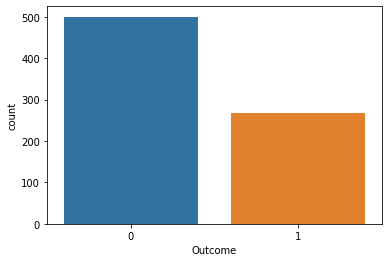

In [ ]:
sns.countplot(df["Outcome"])

In [ ]:
dependet_variables=list(df.columns)[:-1]
dependet_variables

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


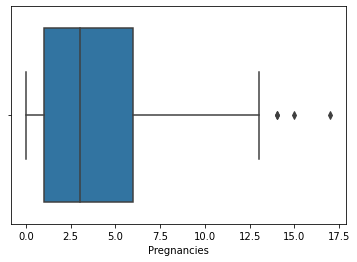

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


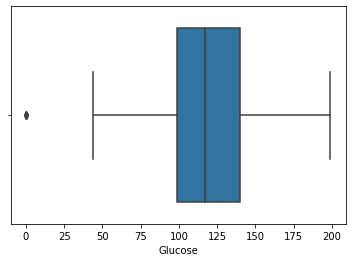

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


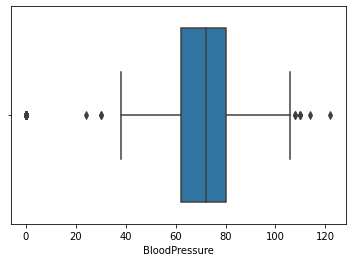

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


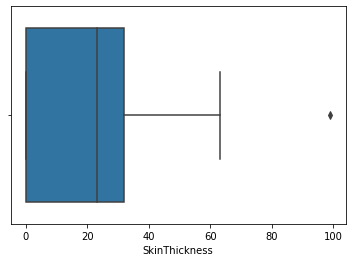

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


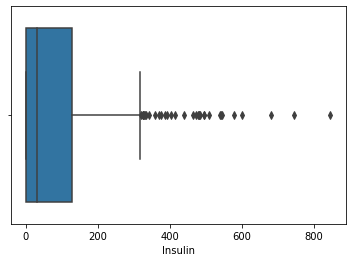

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


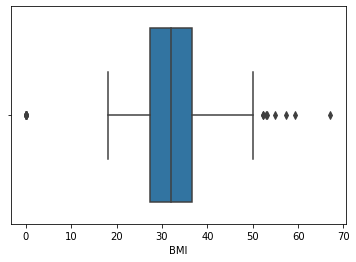

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


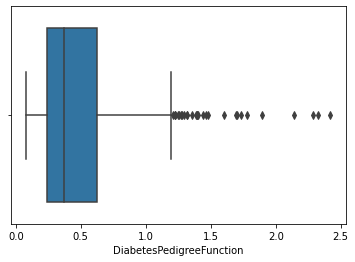

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


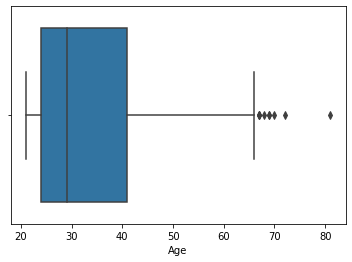

In [ ]:
for i in dependet_variables:
  sns.boxplot(df[i])
  plt.show()

In [ ]:
# removing outliers 
df=df[df['BMI']!=0]
df=df[df['BloodPressure']!=0]
df=df[df['SkinThickness']<60]
df=df[df['Glucose']!=0]
df=df[df['Insulin']<400]

In [ ]:
dependet_variables=list(df.columns)[:-1]
dependet_variables

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

In [ ]:
for i in dependet_variables:
  print(df.groupby("Outcome")[i].median().reset_index(),'\n')

   Outcome  Pregnancies
0        0            2
1        1            5 

   Outcome  Glucose
0        0      107
1        1      138 

   Outcome  BloodPressure
0        0             70
1        1             75 

   Outcome  SkinThickness
0        0             22
1        1             27 

   Outcome  Insulin
0        0       44
1        1        0 

   Outcome   BMI
0        0  30.1
1        1  34.2 

   Outcome  DiabetesPedigreeFunction
0        0                     0.336
1        1                     0.451 

   Outcome  Age
0        0   27
1        1   36 



by setting a threshold value to each of the parameter we can predict weather the cell is m/b or we can also use the machine learning model to get better results 

In [ ]:
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,stratify=y)

checking weather it is divided equaly or not

In [ ]:
y_test.value_counts()/y_test.value_counts().sum()

0    0.664773
1    0.335227
Name: Outcome, dtype: float64

In [ ]:
y_train.value_counts()/y_train.value_counts().sum()

0    0.664762
1    0.335238
Name: Outcome, dtype: float64

# logestic regression

## scaling the data 

In [ ]:
from sklearn.preprocessing import MinMaxScaler

In [ ]:
lr_scaler=MinMaxScaler()

In [ ]:
X_train_scaled=lr_scaler.fit_transform(X_train)
X_test_scaled=lr_scaler.transform(X_test)

## model creation and evaluation

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr_model=LogisticRegression()

In [ ]:
lr_model=train_and_score(lr_model,X_test_scaled,X_train_scaled,y_test,y_train)

Training time: 0.0002min
				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.79      0.91      0.85       349
           1       0.74      0.52      0.61       176

    accuracy                           0.78       525
   macro avg       0.77      0.72      0.73       525
weighted avg       0.77      0.78      0.77       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.79      0.93      0.85       117
           1       0.79      0.51      0.62        59

    accuracy                           0.79    

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
param_dict = {'C': [0.001,0.01,0.1,1,10,100],'penalty': ['l2'],'max_iter':[1000]} 

In [ ]:
lr_model=LogisticRegression()

In [ ]:
lr_grid=GridSearchCV(lr_model,param_grid=param_dict,n_jobs=-1, cv=5, verbose = 5)

In [ ]:
lr_grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [1000], 'penalty': ['l2']},
             verbose=5)

In [ ]:
lr_grid=train_and_score(lr_grid,X_test_scaled,X_train_scaled,y_test,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
Training time: 0.0035min
The best parameters found out to be : {'C': 10, 'max_iter': 1000, 'penalty': 'l2'}
 
where negative mean squared error is:  0.7714285714285714 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.80      0.90      0.85       349
           1       0.74      0.56      0.64       176

    accuracy                           0.79       525
   macro avg       0.77      0.73      0.74       525
weighted avg       0.78      0.79      0.78       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
       

# svm

In [ ]:
from sklearn.svm import SVC

In [ ]:
svc_model=SVC()

In [ ]:
svc_model_grid=train_and_score(svc_model,X_test_scaled,X_train_scaled,y_test,y_train)

Training time: 0.0002min
				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.82      0.93      0.87       349
           1       0.82      0.59      0.69       176

    accuracy                           0.82       525
   macro avg       0.82      0.76      0.78       525
weighted avg       0.82      0.82      0.81       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.80      0.89      0.84       117
           1       0.72      0.56      0.63        59

    accuracy                           0.78    

In [ ]:
svc_model=SVC()

In [ ]:
param_dict_svc={'C': [0.1,1,10,100], 'kernel': ('linear', 'rbf','poly')}

In [ ]:
svc_grid=GridSearchCV(estimator=SVC(),param_grid=param_dict_svc,cv=5,n_jobs=-1,verbose=5)


In [ ]:
svc_grid_model=train_and_score(svc_grid,X_test_scaled,X_train_scaled,y_test,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.0905min
The best parameters found out to be : {'C': 1, 'kernel': 'poly'}
 
where negative mean squared error is:  0.7714285714285714 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.81      0.94      0.87       349
           1       0.83      0.57      0.68       176

    accuracy                           0.82       525
   macro avg       0.82      0.76      0.77       525
weighted avg       0.82      0.82      0.81       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision

---
# KNN
---

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
scaler = MinMaxScaler()

In [ ]:
#scaling all the feature by min max scaler
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
# creating KNN model
knn_model = KNeighborsClassifier(n_jobs=-1)

# finding the best parameters for knn_model by gridsearchcv
param_dict={'n_neighbors':[3,5,7,9,11,13,15,21,23,25]}
knn_grid= GridSearchCV(knn_model,param_grid=param_dict)

# training and evaluating the PolynomialFeatures
train_and_score(knn_grid,X_train_scaled, X_test_scaled, y_train, y_test)

Training time: 0.0085min
The best parameters found out to be : {'n_neighbors': 21}
 
where negative mean squared error is:  0.777936507936508 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.77      0.96      0.85       117
           1       0.83      0.42      0.56        59

    accuracy                           0.78       176
   macro avg       0.80      0.69      0.71       176
weighted avg       0.79      0.78      0.75       176



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.74      0.91    

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 21, 23, 25]})

---
# Desision Tree
---

In [ ]:
from sklearn.tree import DecisionTreeClassifier
# creating DecisionTree model
DecisionTree = DecisionTreeClassifier()

# training and evaluating the DecisionTree
train_and_score(DecisionTree,X_test, X_train, y_test, y_train)

Training time: 0.0001min
				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       176

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.76      0.77      0.76       117
           1       0.53      0.51      0.52        59

    accuracy                           0.68    

DecisionTreeClassifier()

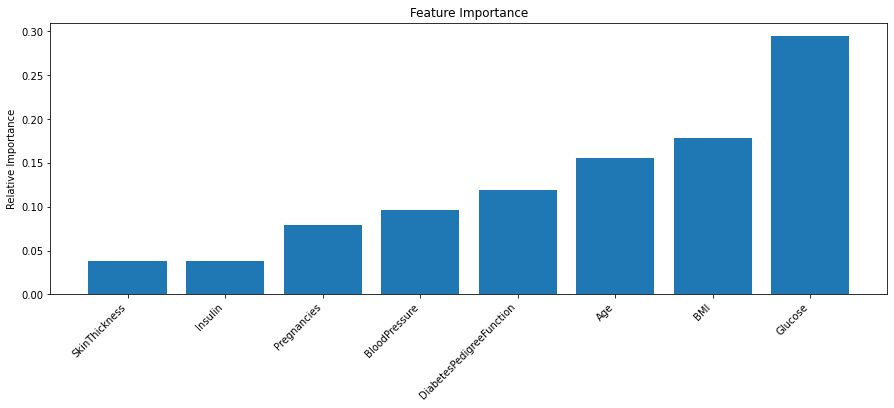

In [ ]:
feature_importances_graph(DecisionTree,'Outcome')

---
# Random forest
---

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# creating Random Forest Regressor model
rfc=RandomForestClassifier(n_jobs=-1,verbose=0)

In [ ]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc,X_test, X_train, y_test, y_train,best_parameter=True)

Training time: 0.0042min
				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       176

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.78      0.84      0.81       117
           1       0.62      0.53      0.57        59

    accuracy                           0.73    

RandomForestClassifier(n_jobs=-1)

## implimenting grid search random forest
---

In [ ]:
# creating RandomForestRegressor model
rfc=RandomForestClassifier()

In [ ]:
rfc.get_params

<bound method BaseEstimator.get_params of RandomForestClassifier()>

In [ ]:
# finding the best parameters for knn_model by gridsearchcv
grid_values_rf = {'n_estimators': [125,150,200],'max_depth': [3,5,7,10],'criterion': ['entropy']}
rfc_grid = GridSearchCV(estimator=rfc,param_grid = grid_values_rf,cv=5,verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the Random Forest Regressor
train_and_score(rfc_grid,X_train, X_test, y_train, y_test)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Training time: 0.2189min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 3, 'n_estimators': 150}
 
where negative mean squared error is:  0.7838095238095237 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.83      0.97      0.90       117
           1       0.92      0.61      0.73        59

    accuracy                           0.85       176
   macro avg       0.88      0.79      0.82       176
weighted avg       0.86      0.85      0.84       176



				score matrix for test
********************************************************************************
				classification report
 ***********************************************************************

GridSearchCV(cv=5, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7, 10],
                         'n_estimators': [125, 150, 200]},
             verbose=5)

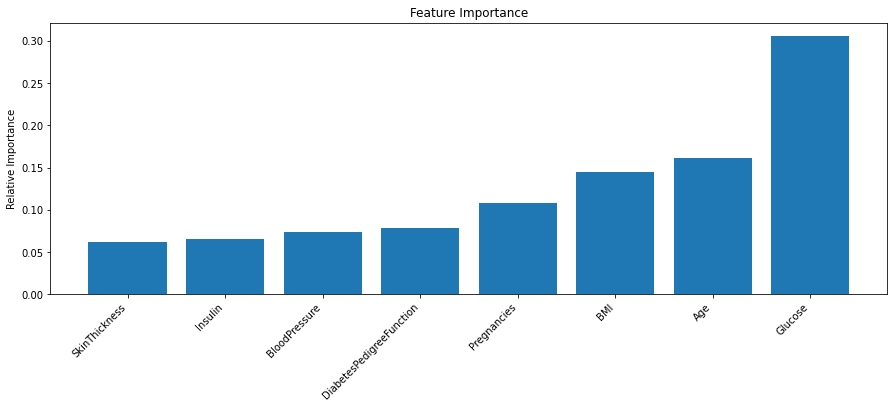

In [ ]:
feature_importances_graph(rfc_grid.best_estimator_,'Outcome')

---
#XGboost
---

In [ ]:
from xgboost import XGBClassifier

In [ ]:
# creating XGBRegressor model
xgbc=XGBClassifier()

In [ ]:
# training and evaluating the xgb_grid
train_and_score(xgbc,X_test, X_train, y_test, y_train)

Training time: 0.001min
				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.94      0.95      0.95       349
           1       0.91      0.88      0.89       176

    accuracy                           0.93       525
   macro avg       0.92      0.92      0.92       525
weighted avg       0.93      0.93      0.93       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.80      0.85      0.83       117
           1       0.66      0.59      0.62        59

    accuracy                           0.76     

XGBClassifier()

In [ ]:
xgbc.get_params

<bound method XGBModel.get_params of XGBClassifier()>

## implimenting grid search xgb
---

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
xgbc_param={'n_estimators': [100,125,150],'max_depth': [3,5,7],'criterion': ['entropy']}
xgbc_grid=GridSearchCV(estimator=xgbc,param_grid=xgbc_param,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the xgb_grid
train_and_score(xgbc_grid,X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training time: 0.0443min
The best parameters found out to be : {'criterion': 'entropy', 'max_depth': 7, 'n_estimators': 125}
 
where negative mean squared error is:  0.6593650793650794 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       176

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



				score matrix for test
********************************************************************************
				classification report
 ************************************************************************

GridSearchCV(cv=5, estimator=XGBClassifier(), n_jobs=-1,
             param_grid={'criterion': ['entropy'], 'max_depth': [3, 5, 7],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

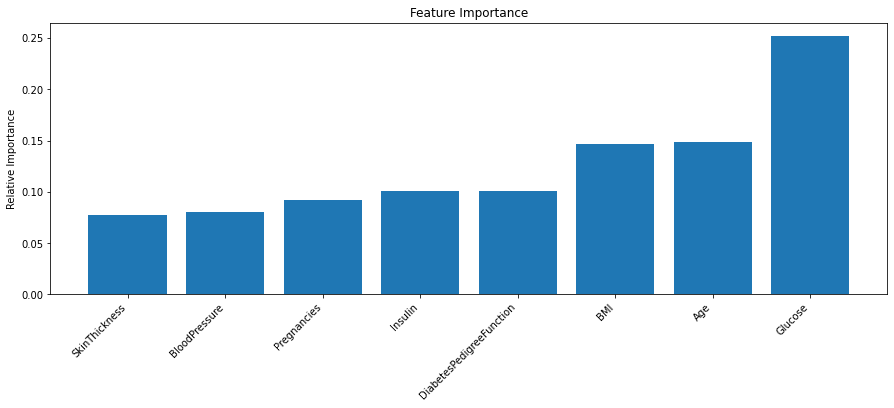

In [ ]:
feature_importances_graph(xgbc_grid.best_estimator_,'Outcome')

---
# lightGBM
---

In [ ]:
import lightgbm as lgb

In [ ]:
lgbc=lgb.LGBMClassifier()

In [ ]:
# training and evaluating the lgbr_grid
train_and_score(lgbc, X_test, X_train, y_test, y_train)

Training time: 0.0008min
 
where negative mean squared error is:  defaultdict(<class 'dict'>, {}) 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       176

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       0.79      0.81      0.80       117
           1       0.61    

LGBMClassifier()

In [ ]:
# finding the best parameters for XGBRegressor by gridsearchcv
lgbc_para={'n_estimators': [100,125,150],'max_depth': [3,5,7]}
lgbc_grid=GridSearchCV(estimator=lgbc,param_grid=lgbc_para,cv=5,scoring='recall',verbose=5,n_jobs=-1)

In [ ]:
# training and evaluating the lgbr_grid
train_and_score(lgbc_grid,X_test, X_train, y_test, y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
Training time: 0.0278min
The best parameters found out to be : {'max_depth': 7, 'n_estimators': 100}
 
where negative mean squared error is:  0.6485714285714286 

				score matrix for train
********************************************************************************
				classification report
 ******************************************************************************** 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       176

    accuracy                           1.00       525
   macro avg       1.00      1.00      1.00       525
weighted avg       1.00      1.00      1.00       525



				score matrix for test
********************************************************************************
				classification report
 ******************************************************************************** 
              

GridSearchCV(cv=5, estimator=LGBMClassifier(), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7],
                         'n_estimators': [100, 125, 150]},
             scoring='recall', verbose=5)

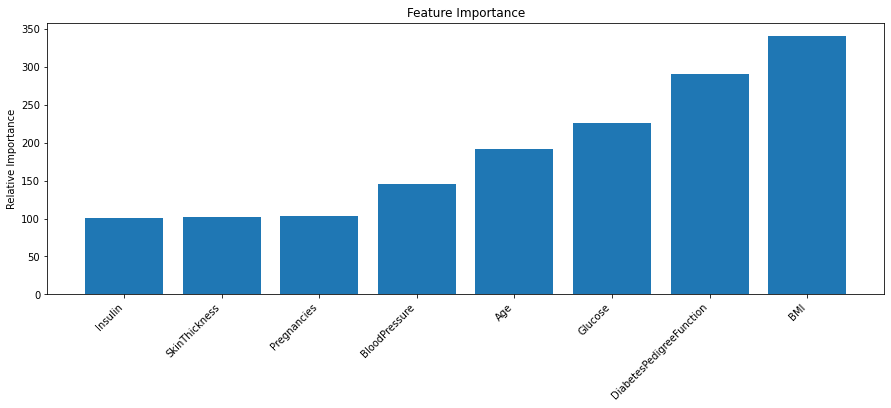

In [ ]:
feature_importances_graph(lgbc_grid.best_estimator_,'Outcome')

# saving the model

In [ ]:
import pickle

In [ ]:
filename='Diabetes_detection.pkl'

In [ ]:
#save
with open(filename,'wb') as f:
    pickle.dump(rfc_grid,f)

In [ ]:
# load
with open(filename ,'rb') as f:
    clf2 = pickle.load(f)